In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sequence_limits as sql
import pi_sequences as pl
import diffeq_midpoint as dm

# Classwork 4
## Saktill
### October 1, 2016


## Exercise A.1: Determine the limit of a sequence

**a)**Write a python function for computing and returning the sequence
$$ a_n = \frac{(7+1)/(n+1)}{(3-1)/(n+1)^2}, n = 0,2,4......N $$

Write out the sequence for $N = 100$. Find the exact limit as $N → ∞$
and compare with $a_N$ .

In [2]:
#When N goes to infinity the exact limit will be 7/3 or 2.33333333. Now comparing to the limit as N=100
sql.sequence_a_n(100)

array([ 4.        ,  2.53846154,  2.43243243,  2.39726027,  2.38016529,
        2.37016575,  2.36363636,  2.35905045,  2.3556582 ,  2.35304991,
        2.35098336,  2.34930643,  2.34791889,  2.34675206,  2.34575734,
        2.34489938,  2.34415187,  2.34349483,  2.34291281,  2.34239369,
        2.34192781,  2.34150739,  2.34112611,  2.34077875,  2.34046098,
        2.34016919,  2.33990031,  2.33965175,  2.3394213 ,  2.33920705,
        2.33900735,  2.33882076,  2.33864605,  2.3384821 ,  2.33832797,
        2.33818278,  2.33804579,  2.33791632,  2.33779377,  2.3376776 ,
        2.33756732,  2.3374625 ,  2.33736274,  2.33726768,  2.33717701,
        2.33709041,  2.33700763,  2.33692842,  2.33685255,  2.33677981,
        2.33671002])

As we can see the values in the array start to converge toward the exact limit when $N\rightarrow ∞$

**b)** Write a Python function limit(seq) that takes a sequence of numbers
as input, stored in a list or array seq, and returns the limit of the sequence,
if it exists, otherwise None is returned. Test the limit function on the
sequence in a) and on the divergent sequence $b_n = n$.

**Hint.** One possible quite strict test for determining if a sequence $(a_n)_{n=0}^{N}$
has a limit is to check
$$|a_n| − |a_{n+1}| < |a_{n−1}| − |a_n|,
n = 1, . . . , N − 1$$

In [3]:
sql.test_limit()

500.0

The function happens to work for the divergent sequence in this case because we are moving in integer steps in the sequence and 

**c)** Write a Python function for computing and returning the sequence
$$D_n = \frac{sin(2^{−n})}{2^{−n}} , n = 0, . . . , N .$$
Call limit from b) to determine the limit of the sequence (for a sufficiently
large N).

In [4]:
a = sql.sequence_D(1000)
sql.limit(a)

1.0

So for sufficiently large values of $N$ the sequence $D_n$ converges to 1.

**d)** Given the sequence $$E_n = \frac{f(x + h) − f(x)}{h} , h = 2^{−n},$$ make a function E(f, x, N) that takes a function $f(x)$, a value $x$, and
the number N of terms in the sequence as arguments, and returns the
sequence $E_n$ for $n = 0, 1, . . . , N$. Make a call to the D function with
$f(x) = sin x, x = 0$, and $N = 80$. Find the limit with aid of the limit
function above. Plot the evolution of the computed $E_n$ values, using
small circles for the data points.


**e)** Make another call to E where $x = π$, let the limit function analyze
the sequence, and plot this sequence in a separate figure. What would
be your expected limit?

**f)** Explain why the computations for $x = π$ go wrong for large $N$.
**Hint.** Print out the numerator and denominator in $E_n$.

## Exercise A.2: Compute $\pi$ via sequences
The following sequences all converge to $\pi$

$$(a_n)_{n=1}^{∞}, a_n = 4 \sum_{k=1}^{n}\frac{(−1)^{k+1}}{2k − 1} ,$$
$$(b_n))_{n=1}^{∞},b_n = \left(6\sum_{k=1}^{n}k^{-2}\right)^{1/2},$$
$$(c_n))_{n=1}^{∞},c_n = \left(90\sum_{k=1}^{n}k^{-4}\right)^{1/4},$$
$$(d_n)_{n=1}^{∞}, d_n = \frac{6}{\sqrt{3}}\sum_{k=1}^{n}\frac{(−1)^{k}}{3^k(2k+1)} ,$$
$$(e_n)_{n=1}^{∞}, e_n = 16\sum_{k=1}^{n}\frac{(−1)^{k}}{5^{2k+1}(2k+1)} - 4 \sum_{k=1}^{n}\frac{(−1)^{k}}{239^{2k+1}(2k+1)} ,$$

Make a function for each sequence that returns an array with the elements
in the sequence. Plot all the sequences, and find the one that converges
fastest toward the limit $π$.

## Solution:
I first wrote out each sequence as a purely mathematical function, using a for loop to add each term of the sequence to the total, for a given n. Then I created one function which would take as input: which sequence you wanted, and how many iterations to run. To illustrate the functions, I also created a function which would plot a specific sequence, and a function which would plot all. 

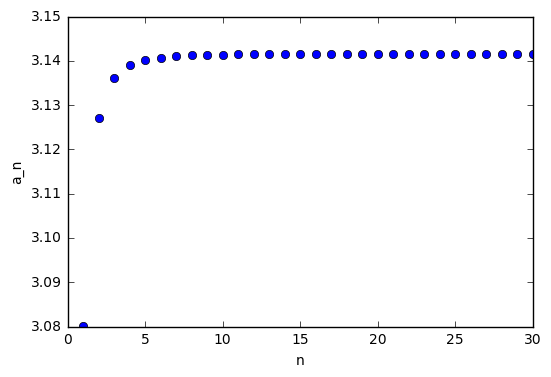

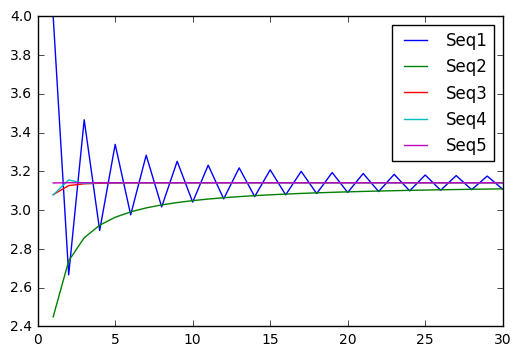

In [5]:
pl.plotSeq(30,pl.f3)
plt.hold('off')
pl.plotAll(30)

Clearly the last sequence converges to $\pi$ the quickest (as it had better, for being so convoluted).

## Exercise A.12: Make difference equations for the Midpoint

Use the ideas of Section A.1.7 to make a similar system of difference
equations and corresponding implementation for the Midpoint integration
rule:
$$ \int_{a}^{b}f(x)dx ≈ h \sum_{i=0}^{n}f(a − \frac{1}{2}h + ih), $$

where $h = (b − a)/n$ and n counts the number of function evaluations
(i.e., rectangles that approximate the area under the curve).

## Solution:
For the midpoint approximation, I essentially just implemented a version of the original midpoint approximation, but which returned an array instead of just an end value. The result is that instead of just a value for the definite integral, you actually get a set of the integral evaluated nearly continuously along the x-axis. So, for example, the function given in the book, which has no analytic solution:
$$\frac{1}{\sqrt{2\pi}}e^{-x^2}$$

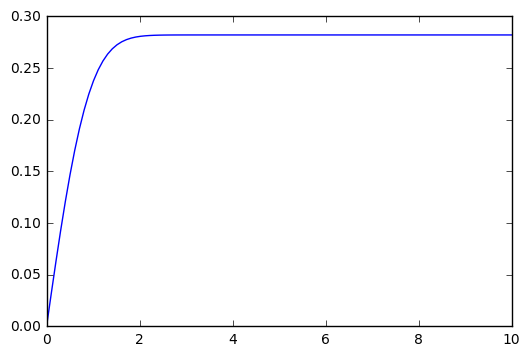

In [13]:
def f(x): return ((1.)/np.pi)*np.exp(-x**2)
l = dm.diffMidptInt(f,0,10,100)
plt.plot(l[0],l[1])
plt.show()